## Importing Libraries

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Data manipulation

import numpy as np

import pandas as pd



# Visualization

import matplotlib.pyplot as plt

import seaborn as sns



# Preprocessing

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures

from sklearn.decomposition import PCA

from sklearn.feature_selection import RFE

from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV, cross_validate, KFold

from scipy.stats.mstats import winsorize

from sklearn.preprocessing import LabelEncoder



# Models

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, VotingClassifier

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier, XGBRegressor

from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from sklearn.neural_network import MLPClassifier



# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score



# Pipeline

from sklearn.pipeline import Pipeline



# Explainable AI

import shap

## Understanding Data

In [3]:
# Load datatrain

data = pd.read_csv('/kaggle/input/eedi-mining-misconceptions-in-mathematics/train.csv')

data.head()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
1,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify,2142.0,143.0,2142.0,NaN
2,2,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct,1287.0,NaN,1287.0,1073.0
3,3,2377,Recall and use the intersecting diagonals prop...,88,Properties of Quadrilaterals,C,The angles highlighted on this rectangle with ...,acute,obtuse,\( 90^{\circ} \),Not enough information,1180.0,1180.0,NaN,1180.0
4,4,3387,Substitute positive integer values into formul...,67,Substitution into Formula,A,The equation \( f=3 r^{2}+3 \) is used to find...,\( 30 \),\( 27 \),\( 51 \),\( 24 \),NaN,NaN,NaN,1818.0


In [4]:
# Load dataset

test_data = pd.read_csv('/kaggle/input/eedi-mining-misconceptions-in-mathematics/test.csv')

test_data.head()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText
0,1869,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets
1,1870,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify
2,1871,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct


In [5]:
# Load dataset

misconception_data = pd.read_csv('/kaggle/input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv')

misconception_data.head()

,MisconceptionId,MisconceptionName
0,0,Does not know that angles in a triangle sum to...
1,1,Uses dividing fractions method for multiplying...
2,2,Believes there are 100 degrees in a full turn
3,3,Thinks a quadratic without a non variable term...
4,4,Believes addition of terms and powers of terms...


In [6]:
# Load dataset

sample_data = pd.read_csv('/kaggle/input/eedi-mining-misconceptions-in-mathematics/sample_submission.csv')

sample_data.head()

,QuestionId_Answer,MisconceptionId
0,1869_B,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,1869_C,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
2,1869_D,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
3,1870_A,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
4,1870_B,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...


In [7]:
data.describe(include='all')

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
count,1869.000000,1869.000000,1869,1869.000000,1869,1869,1869,1869,1869,1869,1869,1135.000000,1118.000000,1080.000000,1037.000000
unique,NaN,NaN,757,NaN,163,4,1857,1219,1230,1222,1184,NaN,NaN,NaN,NaN
top,NaN,NaN,Calculate the square of a number,NaN,Linear Equations,C,Which of the following pairs of function machi...,Only Tom,Only Katie,Both Tom and Katie,Neither is correct,NaN,NaN,NaN,NaN
freq,NaN,NaN,14,NaN,53,488,4,93,109,158,187,NaN,NaN,NaN,NaN
mean,934.000000,1613.261637,NaN,225.370787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1308.599119,1308.029517,1285.300926,1264.568949
std,539.678145,1060.591804,NaN,238.536233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744.518370,766.487351,742.212198,759.818341
min,0.000000,4.000000,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,0.000000
25%,467.000000,575.000000,NaN,92.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,686.000000,628.500000,652.250000,578.000000
50%,934.000000,1470.000000,NaN,203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1336.000000,1379.000000,1294.500000,1282.000000
75%,1401.000000,2637.000000,NaN,238.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954.000000,1970.000000,1912.000000,1897.000000


In [8]:
misconception_data.describe(include='all')

,MisconceptionId,MisconceptionName
count,2587.000000,2587
unique,NaN,2587
top,NaN,Does not know that angles in a triangle sum to...
freq,NaN,1
mean,1293.000000,NaN
std,746.946897,NaN
min,0.000000,NaN
25%,646.500000,NaN
50%,1293.000000,NaN
75%,1939.500000,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QuestionId        1869 non-null   int64  
 1   ConstructId       1869 non-null   int64  
 2   ConstructName     1869 non-null   object 
 3   SubjectId         1869 non-null   int64  
 4   SubjectName       1869 non-null   object 
 5   CorrectAnswer     1869 non-null   object 
 6   QuestionText      1869 non-null   object 
 7   AnswerAText       1869 non-null   object 
 8   AnswerBText       1869 non-null   object 
 9   AnswerCText       1869 non-null   object 
 10  AnswerDText       1869 non-null   object 
 11  MisconceptionAId  1135 non-null   float64
 12  MisconceptionBId  1118 non-null   float64
 13  MisconceptionCId  1080 non-null   float64
 14  MisconceptionDId  1037 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 219.1+ KB


In [10]:
misconception_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MisconceptionId    2587 non-null   int64 
 1   MisconceptionName  2587 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.5+ KB


In [11]:
print(data.shape)

print(list(data.columns))

print(list(data.dtypes))

(1869, 15)
['QuestionId', 'ConstructId', 'ConstructName', 'SubjectId', 'SubjectName', 'CorrectAnswer', 'QuestionText', 'AnswerAText', 'AnswerBText', 'AnswerCText', 'AnswerDText', 'MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']
[dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [12]:
print(test_data.shape)

print(list(test_data.columns))

print(list(test_data.dtypes))

(3, 11)
['QuestionId', 'ConstructId', 'ConstructName', 'SubjectId', 'SubjectName', 'CorrectAnswer', 'QuestionText', 'AnswerAText', 'AnswerBText', 'AnswerCText', 'AnswerDText']
[dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]


In [13]:
print(misconception_data.shape)

print(list(misconception_data.columns))

print(list(misconception_data.dtypes))

(2587, 2)
['MisconceptionId', 'MisconceptionName']
[dtype('int64'), dtype('O')]


## EDA

In [14]:
# Drop Duplicate Rows

data = data.drop_duplicates()
data.shape

(1869, 15)

In [15]:
# Calculate and print percentage of missing values for each column

for col in data.columns:

  # Skip index column if it exists

    if col != data.index.name:

        missing_count = data[col].isnull().sum()

        total_count = len(data)

        missing_percent = (missing_count / total_count) * 100



for col in data.columns:

  # Skip index column if it exists

    if col != data.index.name:

        missing_count = data[col].isnull().sum()

        total_count = len(data)

        missing_percent = (missing_count / total_count) * 100

        print(f"Column: {col} - Missing Values: {missing_percent:.2f}%")

Column: QuestionId - Missing Values: 0.00%
Column: ConstructId - Missing Values: 0.00%
Column: ConstructName - Missing Values: 0.00%
Column: SubjectId - Missing Values: 0.00%
Column: SubjectName - Missing Values: 0.00%
Column: CorrectAnswer - Missing Values: 0.00%
Column: QuestionText - Missing Values: 0.00%
Column: AnswerAText - Missing Values: 0.00%
Column: AnswerBText - Missing Values: 0.00%
Column: AnswerCText - Missing Values: 0.00%
Column: AnswerDText - Missing Values: 0.00%
Column: MisconceptionAId - Missing Values: 39.27%
Column: MisconceptionBId - Missing Values: 40.18%
Column: MisconceptionCId - Missing Values: 42.22%
Column: MisconceptionDId - Missing Values: 44.52%


In [16]:
# Calculate and print percentage of missing values for each column

for col in test_data.columns:

  # Skip index column if it exists

    if col != test_data.index.name:

        missing_count = test_data[col].isnull().sum()

        total_count = len(test_data)

        missing_percent = (missing_count / total_count) * 100




for col in test_data.columns:

  # Skip index column if it exists

    if col != test_data.index.name:

        missing_count = test_data[col].isnull().sum()

        total_count = len(test_data)

        missing_percent = (missing_count / total_count) * 100

        print(f"Column: {col} - Missing Values: {missing_percent:.2f}%")

Column: QuestionId - Missing Values: 0.00%
Column: ConstructId - Missing Values: 0.00%
Column: ConstructName - Missing Values: 0.00%
Column: SubjectId - Missing Values: 0.00%
Column: SubjectName - Missing Values: 0.00%
Column: CorrectAnswer - Missing Values: 0.00%
Column: QuestionText - Missing Values: 0.00%
Column: AnswerAText - Missing Values: 0.00%
Column: AnswerBText - Missing Values: 0.00%
Column: AnswerCText - Missing Values: 0.00%
Column: AnswerDText - Missing Values: 0.00%


In [17]:
# Check the distribution of null values in Misconception[A/B/C/D]Id columns
null_distribution = data[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].isnull().sum()

# Unique values and counts for each misconception column
unique_values = {col: data[col].nunique() for col in ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']}

# Analyze the frequency of each misconception ID
misconception_frequency = data[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].stack().value_counts()

null_distribution, unique_values, misconception_frequency


(MisconceptionAId    734
 MisconceptionBId    751
 MisconceptionCId    789
 MisconceptionDId    832
 dtype: int64,
 {'MisconceptionAId': 740,
  'MisconceptionBId': 727,
  'MisconceptionCId': 695,
  'MisconceptionDId': 673},
 1214.0    54
 1379.0    43
 2316.0    38
 1507.0    36
 1990.0    33
           ..
 138.0      1
 1140.0     1
 1640.0     1
 1862.0     1
 95.0       1
 Name: count, Length: 1604, dtype: int64)

In [18]:
# Analyze the relationship between CorrectAnswer and misconceptions

# CorrectAnswer distribution
correct_answer_distribution = data['CorrectAnswer'].value_counts()

# Misconceptions grouped by correct answers
misconceptions_by_correct_answer = data.groupby('CorrectAnswer')[
    ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']
].apply(lambda x: x.stack().value_counts().head(5))

# Analyze QuestionText length and structure
data['QuestionTextLength'] = data['QuestionText'].apply(len)
question_text_length_stats = data['QuestionTextLength'].describe()

# Check for math symbols or keywords in QuestionText and Answer[A/B/C/D]Text
import re

math_symbols_regex = r'[+\-*/^=()\[\]{}<>,.!%&|_~:;?"`√¬±∑∫∂∇∞∏∝∈∉∪∩⊂⊆⊄⊈∧∨¬→←↑↓⇐⇒⊥⊤⊗⊕∽≠≈≡≪≫≻≺≽≼≡∮∑∫⊂⊆∇∧∨≠∞∫√⊙⋅≺≻⨁⨂⋆∩∪∈∉⌊⌈⌉〈〉≰≱∥∽≷≈≷≨≦≧≮≯≰≱≢⟦⟧⟨⟩⋃⋂⋄⊥⊤⤴⤵⧄⧈αβγδεζηθικλμνξοπρστυφχψωΛΣΔΘΦΞΠΩ]' # Regex for common math symbols
data['ContainsMathSymbols'] = data['QuestionText'].apply(lambda x: bool(re.search(math_symbols_regex, x)))
math_symbols_stats = data['ContainsMathSymbols'].value_counts()

# Preview misconception descriptions from misconception_mapping.csv
misconception_descriptions = misconception_data.head(10)  # Top 10 descriptions

# Output the results
(correct_answer_distribution, 
 misconceptions_by_correct_answer, 
 question_text_length_stats, 
 math_symbols_stats, 
 misconception_descriptions)


(CorrectAnswer
 C    488
 A    482
 B    461
 D    438
 Name: count, dtype: int64,
 CorrectAnswer        
 A              2316.0    15
                1507.0    15
                2392.0    12
                1214.0    12
                340.0     11
 B              1214.0    16
                1379.0     9
                1880.0     9
                220.0      8
                1507.0     8
 C              1379.0    15
                1990.0    13
                2392.0    11
                1214.0    11
                2316.0     8
 D              1214.0    15
                1379.0    10
                2316.0     8
                1990.0     8
                1507.0     7
 Name: count, dtype: int64,
 count    1869.000000
 mean      160.600321
 std       134.455493
 min        13.000000
 25%        61.000000
 50%       121.000000
 75%       218.000000
 max      1253.000000
 Name: QuestionTextLength, dtype: float64,
 ContainsMathSymbols
 True    1869
 Name: count, dtype: int64,
    

In [19]:
# Distribution of unique values in ConstructName and SubjectName
construct_distribution = data['ConstructName'].value_counts()
subject_distribution = data['SubjectName'].value_counts()

# Top misconceptions associated with each ConstructName and SubjectName
misconceptions_by_construct = data.groupby('ConstructName')[
    ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']
].apply(lambda x: x.stack().value_counts().head(5))

misconceptions_by_subject = data.groupby('SubjectName')[
    ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']
].apply(lambda x: x.stack().value_counts().head(5))

# Frequency analysis of misconceptions grouped by ConstructName and SubjectName
misconception_count_by_construct = data.groupby('ConstructName')[
    ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']
].count().sum(axis=1).sort_values(ascending=False)

misconception_count_by_subject = data.groupby('SubjectName')[
    ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']
].count().sum(axis=1).sort_values(ascending=False)

# Output the analysis results
(construct_distribution.head(), subject_distribution.head(),
 misconceptions_by_construct.head(), misconceptions_by_subject.head(),
 misconception_count_by_construct.head(), misconception_count_by_subject.head())


(ConstructName
 Calculate the square of a number                                                                                          14
 Solve two-step linear equations, with the variable on one side, with all positive integers                                13
 Factorise a quadratic expression in the form x² + bx + c                                                                  13
 Use the order of operations to carry out calculations involving addition, subtraction, multiplication, and/or division    12
 Identify the order of rotational symmetry of a shape                                                                      12
 Name: count, dtype: int64,
 SubjectName
 Linear Equations               53
 Linear Sequences (nth term)    44
 BIDMAS                         37
 Quadratic Equations            36
 Area of Simple Shapes          36
 Name: count, dtype: int64,
 ConstructName                                                                                              
 A

In [20]:
# Group by ConstructName and MisconceptionId to get counts
misconceptions_by_construct = data.groupby('ConstructName')[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].apply(lambda x: x.stack().value_counts())

# Output the top misconceptions for each construct
misconceptions_by_construct.head(10)


ConstructName                                                                                              
Add algebraic fractions where one denominator is a multiple of the other                             217.0     1
                                                                                                     2234.0    1
Add algebraic fractions where the denominators are single terms and are not multiples of each other  32.0      1
                                                                                                     217.0     1
                                                                                                     1048.0    1
Add algebraic fractions with the same denominator                                                    1825.0    1
                                                                                                     217.0     1
                                                                                                     

In [21]:
# Group by SubjectName and MisconceptionId
misconceptions_by_subject = data.groupby('SubjectName')[
    ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']
].apply(lambda x: x.stack().value_counts())

# Output the top misconceptions for each subject
misconceptions_by_subject.head(10)


SubjectName                                       
2D Names and Properties of Shapes-Others    255.0     3
                                            2104.0    1
                                            294.0     1
                                            570.0     1
                                            977.0     1
                                            2289.0    1
                                            1340.0    1
2D Pythagoras                               483.0     1
Adding and Subtracting Algebraic Fractions  217.0     3
                                            172.0     3
Name: count, dtype: int64

In [22]:
# Count the occurrence of each MisconceptionId for each QuestionText
misconceptions_by_question = data.groupby('QuestionText')[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].apply(lambda x: x.stack().value_counts())

# Show some of the top misconception mappings with respect to QuestionText
misconceptions_by_question.head(10)


QuestionText                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
![2 arrows pointing to the right. + 7 in the first arrow. divide by 2 in the second arrow]() The rule above is used to generate a term-to-term sequence.\nIf the third term is \( 9 \), what is the first term?                                                                                                                                                                                                         

In [23]:
# Cross-analysis: ConstructName, SubjectName, and MisconceptionId
cross_analysis = data.groupby(['ConstructName', 'SubjectName'])[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].apply(lambda x: x.stack().value_counts())

# Show some of the top misconception mappings with respect to Construct and Subject
cross_analysis.head(10)


ConstructName                                                                                        SubjectName                                       
Add algebraic fractions where one denominator is a multiple of the other                             Adding and Subtracting Algebraic Fractions  217.0     1
                                                                                                                                                 2234.0    1
Add algebraic fractions where the denominators are single terms and are not multiples of each other  Adding and Subtracting Algebraic Fractions  32.0      1
                                                                                                                                                 217.0     1
                                                                                                                                                 1048.0    1
Add algebraic fractions with the same denominator              

In [24]:
# Check for specific keywords in QuestionText related to misconceptions
keywords = ['simplify', 'factorize', 'equation', 'solve', 'add', 'multiply', 'fraction', 'angle', 'symmetry']

# Count the presence of these keywords in QuestionText
data['ContainsKeywords'] = data['QuestionText'].apply(lambda x: any(keyword in x.lower() for keyword in keywords))

# Check the distribution of misconceptions for questions containing these keywords
misconceptions_by_keyword = data[data['ContainsKeywords']].groupby('MisconceptionAId')[['MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].apply(lambda x: x.stack().value_counts())

misconceptions_by_keyword.head(10)


MisconceptionAId        
8.0               2362.0    2
                  114.0     1
                  699.0     1
19.0              2082.0    1
                  754.0     1
28.0              455.0     1
                  1426.0    1
                  2341.0    1
                  464.0     1
29.0              2078.0    1
Name: count, dtype: int64

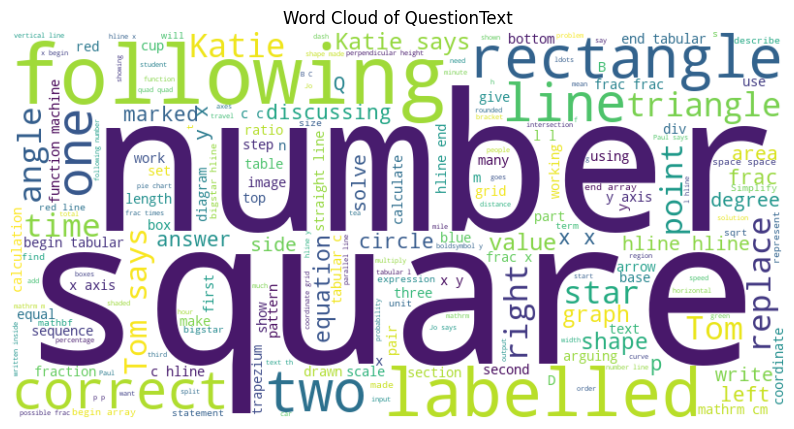

In [25]:
from wordcloud import WordCloud

# Generate word cloud for all QuestionText
text = ' '.join(data['QuestionText'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of QuestionText')
plt.show()
